# Praktek BOW

**Restu Lestari Mulianingrum (A11.2022.14668)**

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
dataset = pd.read_csv('appstore_instagram_reviews_anonymized.csv')

In [3]:
dataset.shape

(500, 11)

In [4]:
dataset.head(10)

,appId,country,date,id,score,text,title,url,userName,userUrl,version
0,389801252,DE,2024-03-20T22:37:03-07:00,11067766035,1,"When I want to share any stories, posts or ree...",List of friends in weird order,https://itunes.apple.com/de/review?id=38980125...,988858b9f96ee718616ad5dc2496ff911ff86bd790caad...,https://itunes.apple.com/de/reviews/id159880897,323.0.0
1,389801252,DE,2024-03-20T22:17:05-07:00,11067726970,4,I have been using the app for a week now. I ca...,Great companion,https://itunes.apple.com/de/review?id=38980125...,06dfad50909f5bc85a0a4198d91da9e5d5ae9954e8bba6...,https://itunes.apple.com/de/reviews/id1333052389,323.0.0
2,389801252,DE,2024-03-20T16:08:40-07:00,11066866484,1,"Instagram, was ist nur mit euch los? Es ist fr...",#Instagram #Fehler #Verbesserung dringend nötig,https://itunes.apple.com/de/review?id=38980125...,4b8d13b92ce712f53651cb538b1c079daa782136547a20...,https://itunes.apple.com/de/reviews/id711608090,323.0.0
3,389801252,DE,2024-03-20T15:54:39-07:00,11066832683,1,Die neue Schriftart ist so unglaublich hässlich.,Hässliche Layout,https://itunes.apple.com/de/review?id=38980125...,52acf5c35b9fa5653f8fb7b9ab7ec305e0ead4f07708bc...,https://itunes.apple.com/de/reviews/id830638504,323.0.0
4,389801252,DE,2024-03-20T14:59:23-07:00,11066699753,1,Null zufrieden darum gelöscht,Instagram absoluter Müll geworden sorry aber e...,https://itunes.apple.com/de/review?id=38980125...,f31334bd164a58cffae342f04040b0f7cb2ad9416ed0b0...,https://itunes.apple.com/de/reviews/id1193916555,323.0.0
5,389801252,DE,2024-03-20T12:45:45-07:00,11066369305,3,"Egal was ich tu, welche Tipps ich anwende , es...",Schlechte Qualität bei story,https://itunes.apple.com/de/review?id=38980125...,1168db996f28be60b5048806366e6901cba1406056a9c2...,https://itunes.apple.com/de/reviews/id1174373362,323.0.0
6,389801252,DE,2024-03-20T12:12:29-07:00,11066284068,2,Hello Instagram I can’t see when anyone is onl...,INSTAGRAM!!!,https://itunes.apple.com/de/review?id=38980125...,692877af4aa8dbe5d371d411a1c76feada5e8ab2f0ba18...,https://itunes.apple.com/de/reviews/id1072507066,323.0.0
7,389801252,DE,2024-03-20T11:38:52-07:00,11066196209,3,Es sieht sehr schlecht aus wie die Likes nun a...,Unnötige Veränderung der Like Anzahl von Komme...,https://itunes.apple.com/de/review?id=38980125...,02ac349808b93a0e32c4ed40156853a08d393a071e85ad...,https://itunes.apple.com/de/reviews/id1332640518,323.0.0
8,389801252,DE,2024-03-20T11:17:03-07:00,11066138243,1,DM‘s not working anymore. They are just loadin...,Nothing works,https://itunes.apple.com/de/review?id=38980125...,be997f7894038c0c470a51cb345c767ec9ef86e232d169...,https://itunes.apple.com/de/reviews/id1549828014,323.0.0
9,389801252,DE,2024-03-20T09:54:27-07:00,11065907989,3,Ich nehme an dass das ein neues Feature ist vo...,Unnötiges feature,https://itunes.apple.com/de/review?id=38980125...,6566f520b77df7c0744a49bacd9d22a01c10a15e5356b1...,https://itunes.apple.com/de/reviews/id561384227,323.0.0


In [5]:
dataset_feature=dataset['text'].astype(str)

In [6]:
dataset_label = dataset['score']

In [7]:
dataset_feature

0      When I want to share any stories, posts or ree...
1      I have been using the app for a week now. I ca...
2      Instagram, was ist nur mit euch los? Es ist fr...
3       Die neue Schriftart ist so unglaublich hässlich.
4                          Null zufrieden darum gelöscht
                             ...                        
495    Not able to use music since update. I can’t ma...
496    My insta keeps glitching out and the notes are...
497    Ion appreciate how y’all took my notes on both...
498    I love this app, Although my algorithm isn’t t...
499    2 advertisements back to back per every 4-5 po...
Name: text, Length: 500, dtype: object

In [8]:
dataset_label

0      1
1      4
2      1
3      1
4      1
      ..
495    1
496    4
497    1
498    5
499    1
Name: score, Length: 500, dtype: int64

In [9]:
dataset_label = dataset_label.dropna()

In [10]:
label_counts = dataset_label.value_counts()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cek Distribusi

C:\Users\RESTU\AppData\Local\Temp\ipykernel_62132\2003059697.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


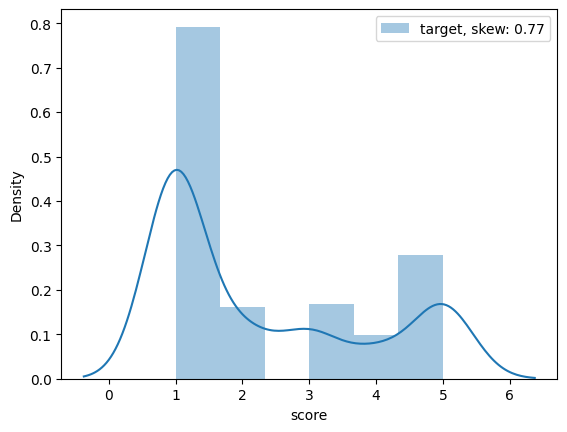

In [12]:
# Visualizing the target variable
plt.figure()
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [13]:
dataset_label.value_counts()

score
1    264
5     93
3     56
2     54
4     33
Name: count, dtype: int64

## BOW

In [14]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset_feature)
feature_names = vectorizer.get_feature_names_out()
print(", ".join(feature_names))

01, 02, 03, 08, 0fficially_cara, 10, 100, 1080p, 10times, 10x, 12, 12am, 13, 14, 15, 150, 16, 17, 1k, 20, 2010, 2024, 21, 24, 30, 30th, 322, 3h, 4g, 50, 5g, 60, 60fps, 7000, 720p, 75, 80, 8months, aa, aaootattt, aap, ab, abandon, aber, abgespielte, abgestempelt, ability, able, ableist, abonniert, about, above, abruptly, absolut, absolute, absolutely, abstürzen, absurdly, abusive, acc, acceptable, access, accidentally, according, account, accounts, accout, accts, accurate, accuses, achtung, across, act, action, activate, activates, active, actively, activity, actual, actualise, actually, ad, add, added, addicted, addictive, adding, addition, additional, addressed, addressing, adds, adhere, admit, ads, adventure, advert, advertise, advertisements, advertising, advice, advocating, affected, affecting, affects, afford, aforementioned, after, again, against, age, agendas, ages, ago, ahnung, ai, ain, aktiviert, aktivitäten, aktualisierungen, aktuelle, alas, album, alert, algo, algorithm, alg

In [15]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(dataset_feature)
feature_names2 = vectorizer2.get_feature_names_out()
print(", ".join(feature_names2))

01 24, 02 24, 03 2024, 03 24, 08 02, 0fficially_cara heavyon_cara, 10 10, 10 comments, 10 in, 10 slides, 10 tries, 10 years, 100 instagram, 1080p for, 10times reinstalled, 10x hintereinander, 12 of, 12am and, 13 advertising, 13 pro, 14 max, 15 03, 15 pro, 15 seconds, 15 und, 150 days, 16 also, 17 iphone, 1k there, 20 03, 20 posts, 20 seconds, 2010 and, 2024 can, 2024 ig, 21 01, 24 30, 24 etc, 24 jetzt, 24 und, 30 01, 30 day, 30 second, 30th and, 322 update, 322 was, 3h auf, 4g 5g, 5g drauf, 60 days, 60fps videos, 7000 leute, 720p since, 75 years, 80 of, 8months is, 8months since, aa rha, aaootattt me, ab dass, ab hier, abandon the, aber accounts, aber auch, aber aufeinmal, aber das, aber die, aber eine, aber es, aber für, aber ich, aber komischerweise, aber nicht, aber süchtig, aber weiter, aber wir, abgespielte video, abgestempelt wird, ability to, able to, able too, ableist racist, abonniert habe, about 20, about channels, about considering, about getting, about how, about instagram,

In [17]:
print(X2.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Simulasi Corpus

In [18]:
corpus = [
    'Media sosial semakin dominan dalam kehidupan sehari-hari.',
    'Belanja online semakin populer di kalangan konsumen.',
    'Banyak orang mulai tertarik pada gaya hidup sehat dan aktif.',
    'Teknologi blockchain semakin banyak digunakan dalam berbagai industri.',
    'Pendidikan online menjadi pilihan utama di tengah pandemi.',
    'Pengguna media sosial semakin meningkat di era digital ini.',
    'Masyarakat mulai beralih ke belanja online untuk kebutuhan sehari-hari.',
    'Gaya hidup sehat dan aktif menjadi tren di kalangan kaum urban.',
    'Pengembangan teknologi blockchain semakin cepat di dunia finansial.',
    'Pendidikan online semakin diterima oleh lembaga-lembaga pendidikan tradisional.'
]


In [19]:
vectorizer = CountVectorizer()

In [20]:
Z = vectorizer.fit_transform(corpus)

In [21]:
vectorizer.get_feature_names_out()

array(['aktif', 'banyak', 'belanja', 'beralih', 'berbagai', 'blockchain',
       'cepat', 'dalam', 'dan', 'di', 'digital', 'digunakan', 'diterima',
       'dominan', 'dunia', 'era', 'finansial', 'gaya', 'hari', 'hidup',
       'industri', 'ini', 'kalangan', 'kaum', 'ke', 'kebutuhan',
       'kehidupan', 'konsumen', 'lembaga', 'masyarakat', 'media',
       'meningkat', 'menjadi', 'mulai', 'oleh', 'online', 'orang', 'pada',
       'pandemi', 'pendidikan', 'pengembangan', 'pengguna', 'pilihan',
       'populer', 'sehari', 'sehat', 'semakin', 'sosial', 'teknologi',
       'tengah', 'tertarik', 'tradisional', 'tren', 'untuk', 'urban',
       'utama'], dtype=object)

In [22]:
print(Z.toarray())

[[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
  0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
  0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [23]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))

In [24]:
Z2 = vectorizer2.fit_transform(corpus)

In [25]:
vectorizer2.get_feature_names_out()

array(['aktif menjadi', 'banyak digunakan', 'banyak orang',
       'belanja online', 'beralih ke', 'berbagai industri',
       'blockchain semakin', 'cepat di', 'dalam berbagai',
       'dalam kehidupan', 'dan aktif', 'di dunia', 'di era',
       'di kalangan', 'di tengah', 'digital ini', 'digunakan dalam',
       'diterima oleh', 'dominan dalam', 'dunia finansial', 'era digital',
       'gaya hidup', 'hidup sehat', 'kalangan kaum', 'kalangan konsumen',
       'kaum urban', 'ke belanja', 'kebutuhan sehari', 'kehidupan sehari',
       'lembaga lembaga', 'lembaga pendidikan', 'masyarakat mulai',
       'media sosial', 'meningkat di', 'menjadi pilihan', 'menjadi tren',
       'mulai beralih', 'mulai tertarik', 'oleh lembaga',
       'online menjadi', 'online semakin', 'online untuk', 'orang mulai',
       'pada gaya', 'pendidikan online', 'pendidikan tradisional',
       'pengembangan teknologi', 'pengguna media', 'pilihan utama',
       'populer di', 'sehari hari', 'sehat dan', 'semakin 

In [26]:
print(Z2.toarray())

[[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
  1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0